In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bias-Variance Tradeoff 

The bias-variance tradeoff describes the relationship between the generalization (test) error and the model complexity. This error can be decomposed in _bias error_ (error from wrong model assumptions), _variance_ (error from sensitivity to small fluctuation in training data) and _irreducible error_ (inherent noise).

Let's take <center>$f(x) = e^{-0.5x}\cos(x)$</center> with error $e$ equal to <center>$e = \mathcal{N}(0; 0.1)$</center>

In [138]:
def f(x):
    return np.cos(x) * np.exp(-0.5*x)

x = np.linspace(1, 10, 10000)
e = np.random.normal(loc=0, scale=.1, size=len(x))
y = f(x) + e

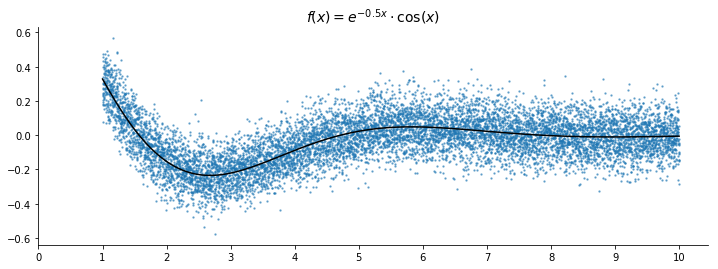

In [139]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x, y, s=2, alpha=.5)
ax.plot(x, f(x), color='k')

ax.set_xticks(range(11))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title(r'$f(x) = e^{-0.5x}\cdot\cos(x)$', fontsize=14)

plt.show()

We want to model $f(x)$ with a polynomial model where <center>$\hat{f}(x) = \sum\limits_{k=0}^N w_nx^n$</center> with N being the polynomial order.

In [140]:
def f_hat(x, W):
    N = len(W) - 1
    return np.sum(W * np.power(x, np.arange(N, -1, -1).reshape(-1, 1)).T, axis=1)

In [143]:
N = len(x)
sample_size = int(0.01 * N)

orders = [1, 2, 3, 6]
n_samples = 6

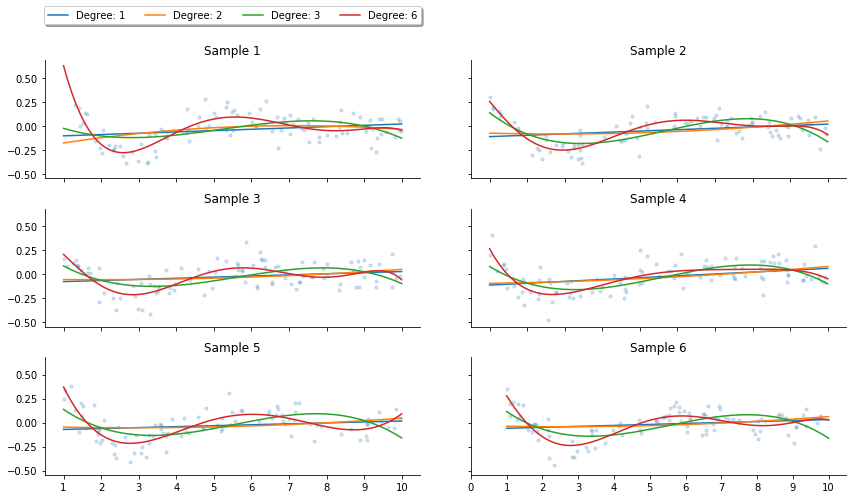

In [150]:
f, axs = plt.subplots(3, 2, figsize=(12, 7), sharex=True, sharey=True)
axs = axs.flatten()

for ax, n in zip(axs, range(n_samples)):

    idx = np.random.choice(range(len(x)), sample_size)
    train_x, train_y = x[idx], y[idx]

    for order in orders:
        
        W = np.polyfit(train_x, train_y, order)
        ax.plot(x, f_hat(x, W), label=f'Degree: {order}', alpha=1)

    ax.scatter(train_x, train_y, s=10, alpha=.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title(f'Sample {n+1}')

axs[0].legend(loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=5, fancybox=True, shadow=True)
ax.set_xticks(range(11))
plt.tight_layout()